In [1]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('iris')

In [3]:
df

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [4]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
encoder=LabelEncoder()
df['species']=encoder.fit_transform(df['species'])

In [6]:
df

sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]

In [7]:
df = df[['sepal_length','petal_length','species']]

In [8]:
df

sepal_length  petal_length  species
0             5.1           1.4        0
1             4.9           1.4        0
2             4.7           1.3        0
3             4.6           1.5        0
4             5.0           1.4        0
..            ...           ...      ...
145           6.7           5.2        2
146           6.3           5.0        2
147           6.5           5.2        2
148           6.2           5.4        2
149           5.9           5.1        2

[150 rows x 3 columns]

In [9]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [10]:
x

sepal_length  petal_length
0             5.1           1.4
1             4.9           1.4
2             4.7           1.3
3             4.6           1.5
4             5.0           1.4
..            ...           ...
145           6.7           5.2
146           6.3           5.0
147           6.5           5.2
148           6.2           5.4
149           5.9           5.1

[150 rows x 2 columns]

In [11]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=0.2)

In [14]:
clf=LogisticRegression(multi_class='multinomial')

In [15]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

c:\Users\Gargi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [16]:
print(accuracy_score(y_test,y_pred))

0.9666666666666667


In [17]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

0  1  2
0  14  0  0
1   0  7  1
2   0  0  8

In [18]:
query=np.array([[3.4,2.7]])

In [19]:
clf.predict(query)

c:\Users\Gargi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [20]:
clf.predict_proba(query)

c:\Users\Gargi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[7.25865651e-01, 2.73720718e-01, 4.13631316e-04]])

c:\Users\Gargi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


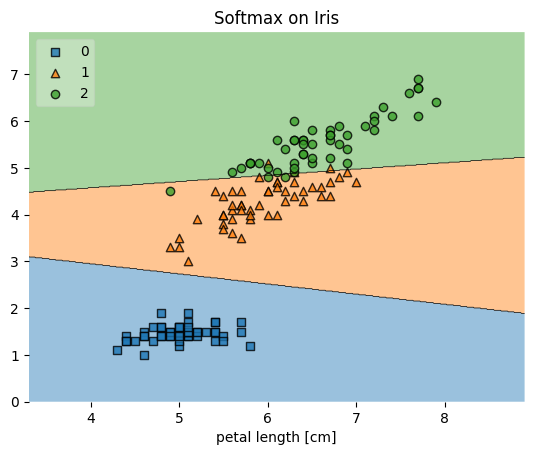

In [22]:

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x.values, y.values, clf, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.xlabel('petal length [cm]')
plt.title('Softmax on Iris')

plt.show()